Some of the problems training huge ANNs:

 * gradients growing ever smaller or larger &rarr; lower layers hard to train
 * not enough training data for such network
 * slow training
 * overfitting if too many features, scarce and/or noisy data
 
Let's understand more about these problems and how to solve them.

# The Vanishing/Exploding Gradient Problems.

DNN tend to suffer from unstable gradients: different layers may learn at widely different speeds.

In the past, this happened due to the standad combination of the sigmoid activation function and whe weights being selected from a normal distribution with mean 0 and std 1

<div>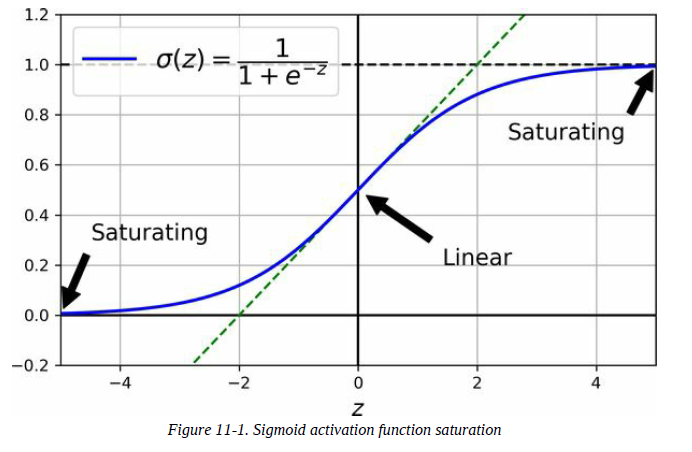</div>

## Glorot and He Initialization

We need the signal to flow properly in both directions: forward when making predcitions, and in reverse when backpropagating gradients.

For the signal to flow properly, the authors argue that we need the variacne of the outputs of each layer to be equal to the variance of its inputs, and we need the gradients to have equal variance before and after flowing through a layer in the reverse direction. 

A good start is to guarantee that the number of inputs (_fan-in_) and outputs (_fan-out_) of the layer are the same. A good compromise is to guarantee that the connection weights of each layer be randomly intialized as the following able &rarr _Xavier initialization or Glorot initialization_

Normal distribution with mean 0 and variance $\sigma_2=\frac{1}{fan_{avg}}$ Or a uniform
distribution between -r and +r, with $r=3fan_{avg}$, where $fan_{avg} = \frac{fan_{in}+fan_{out}}{2}$

<div>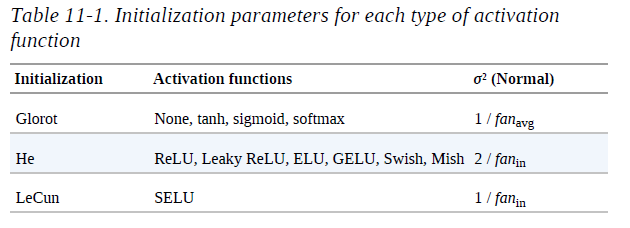</div>

By default, Kers uses Glorot initialization with a uniform distribution.

In [ ]:
import tensorflow as tf

dense = tf.keras.layers.Dense(50, activation="relu",
                kernel_initializer="he_normal")

## Better Actiavtion Functions

ReLU activation function suffers from _dying ReLUs_ which happens when some neurons stop outputting anything other than 0. A neuron "dies" when its weights get tweaked in such a way that the input of the ReLU function is negative for all instances in the training set. 

To solve this, we can use a variant of ReLU &rarr; _leaky ReLU_

### Leaky ReLU

$LeakyReLU_{\alpha}(z)=max(\alpha z,z)$

<div>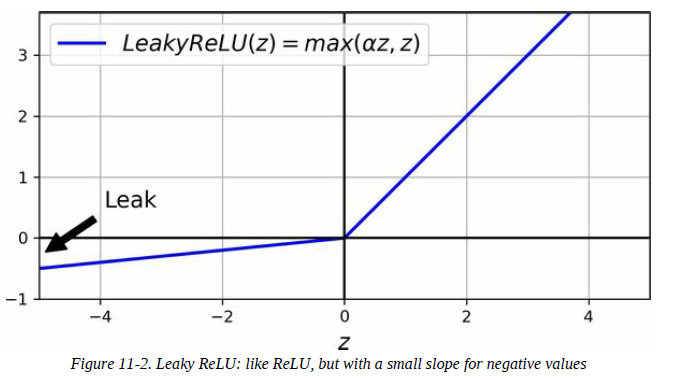</div>

In [ ]:
leaky_relu = tf.keras.layers.LeakyReLU(alpha=0.2) # defaults to alpha=0.3
dense = tf.keras.layers.Dense(50, activation=leaky_relu,
        kernel_initializer="he_normal")